In [1]:
from colorama import Fore   #for colorfull logging instead of just printing
import pandas as pd
import numpy as np
import random

In [2]:
#base dataset path
BASE_PATH = '/kaggle/input/stanford-large-movie-review-dataset-imdb/aclImdb'

#dataset path obj
DATASET_PATH = {
    "TRAIN": {
        "POS": "train/pos",
        "NEG": "train/neg"
    },
    "TEST": {
        "POS": "test/pos",
        "NEG": "test/neg"
    }
}

In [3]:
!pip install nltk
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **1. Data Loading**
1. Load data from folders
2. Convert them to train and test Dataframe

Dataset used: [Stanford Large Movie Review Dataset (IMDB)](https://ai.stanford.edu/~amaas/data/sentiment/)

Contains:
- 25000 for **train** with 12500 for +ve sentiment and 12500 for -ve sentiment
- 25000 for **test** with 12500 for +ve sentiment and 12500 for -ve sentiment

In [4]:
import os

#func to load review and lable from folder
def load_review_folder(folder_path, label):
    """
    load review from files in a folder

    @param:
        - folder_path: relative path of folder
        - label: label (0/1) for review data

    @returns:
        - reviews: list of reviews
        - label: list of labels for each review

    """
   
    abs_folder_path = os.path.join(BASE_PATH, folder_path)   #convert relative path to absolute

    print(Fore.BLUE + f"\nSearching in folder: {abs_folder_path} .....")

    #array for review and label
    reviews, labels = [], []
    
    #itterate over all files in the folder
    for filename in os.listdir(abs_folder_path):

        #proceed for .txt files only
        if filename.endswith(".txt"):
            file_path = os.path.join(abs_folder_path, filename)

            #open each file, append its content to reviews array
            with open(file_path, 'r') as f:
                reviews.append(f.read())
                labels.append(label)

    print(Fore.GREEN + "Finished processing folder .....\n")

    return reviews, labels

In [5]:
#load train data
train_pos_reviews, train_pos_labels = load_review_folder(DATASET_PATH["TRAIN"]["POS"], 1)
train_neg_reviews, train_neg_labels = load_review_folder(DATASET_PATH["TRAIN"]["NEG"], 0)

#load test data
test_pos_reviews, test_pos_labels = load_review_folder(DATASET_PATH["TEST"]["POS"], 1)
test_neg_reviews, test_neg_labels = load_review_folder(DATASET_PATH["TEST"]["NEG"], 0)


Searching in folder: /kaggle/input/stanford-large-movie-review-dataset-imdb/aclImdb/train/pos .....
Finished processing folder .....


Searching in folder: /kaggle/input/stanford-large-movie-review-dataset-imdb/aclImdb/train/neg .....
Finished processing folder .....


Searching in folder: /kaggle/input/stanford-large-movie-review-dataset-imdb/aclImdb/test/pos .....
Finished processing folder .....


Searching in folder: /kaggle/input/stanford-large-movie-review-dataset-imdb/aclImdb/test/neg .....
Finished processing folder .....



In [6]:
#combine train pos and neg
X_train = train_pos_reviews + train_neg_reviews
y_train = train_pos_labels + train_neg_labels

#combine test pos and neg
X_test = test_pos_reviews + test_neg_reviews
y_test = test_pos_labels + test_neg_labels

print(f"X_train: {len(X_train)}, X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}, y_test: {len(y_test)}")

X_train: 25000, X_test: 25000
y_train: 25000, y_test: 25000


In [7]:
#convert train data to dataframe
df_train = pd.DataFrame({
    'review': X_train,
    'sentiment': y_train
})

print(df_train["sentiment"].value_counts())
df_train.head()

sentiment
1    12500
0    12500
Name: count, dtype: int64


,review,sentiment
0,This was one of those wonderful rare moments i...,1
1,Have you seen The Graduate? It was hailed as t...,1
2,"I don't watch a lot of TV, except for The Offi...",1
3,Kubrick again puts on display his stunning abi...,1
4,"First of all, I liked very much the central id...",1


In [8]:
#convert test data to dataframe

df_test = pd.DataFrame({
    'review': X_test,
    'sentiment': y_test
})

print(df_test["sentiment"].value_counts())
df_test.head()

sentiment
1    12500
0    12500
Name: count, dtype: int64


,review,sentiment
0,"I've Seen The Beginning Of The Muppet Movie, B...",1
1,If it had been made 2 years later it would hav...,1
2,"Very good ""Precoder"" starring Dick Barthelmess...",1
3,A young man discovers that life is precious af...,1
4,"I'm always surprised, given that the famous ti...",1


## **2. EDA**

1. Creating usefull features: num_chars, num_words, num_sentences
2. Data analysis:
    - View data distribution over labels for train data
    - view the correlation b/w features

sentiment
1    12500
0    12500
Name: count, dtype: int64 



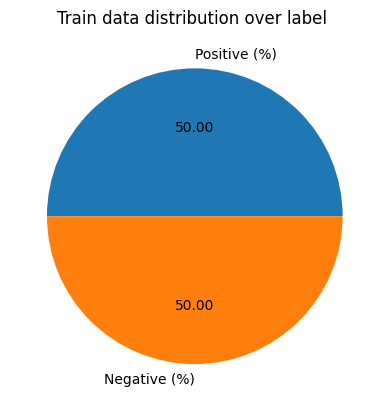

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#getting the numbers of pos and neg review
print(df_train["sentiment"].value_counts(), "\n")

#plotting it
plt.title("Train data distribution over label ")
plt.pie(df_train["sentiment"].value_counts(), labels=["Positive (%)", "Negative (%)"], autopct="%0.2f")
plt.show()

**Conclusion from above pie chart**: Train dataset contains **balanced data distribution** over positive and negative labels

In [10]:
#creating 3 cols (features) for train data: num_chars, num_words, num_sentences

df_train["num_chars"] = df_train["review"].apply(len)
df_train["num_words"] = df_train["review"].apply(lambda x: len(nltk.word_tokenize(x)))
df_train["num_sentence"] = df_train["review"].apply(lambda x: len(nltk.sent_tokenize(x)))

df_train.head()

,review,sentiment,num_chars,num_words,num_sentence
0,This was one of those wonderful rare moments i...,1,787,191,13
1,Have you seen The Graduate? It was hailed as t...,1,4199,863,46
2,"I don't watch a lot of TV, except for The Offi...",1,1391,324,12
3,Kubrick again puts on display his stunning abi...,1,746,147,7
4,"First of all, I liked very much the central id...",1,1016,191,7


In [11]:
#doing the above for test data: will be useful later for analysing misclassification
df_test["num_chars"] = df_test["review"].apply(len)
df_test["num_words"] = df_test["review"].apply(lambda x: len(nltk.word_tokenize(x)))
df_test["num_sentence"] = df_test["review"].apply(lambda x: len(nltk.sent_tokenize(x)))
df_test.head(2)

,review,sentiment,num_chars,num_words,num_sentence
0,"I've Seen The Beginning Of The Muppet Movie, B...",1,745,166,7
1,If it had been made 2 years later it would hav...,1,921,216,13


In [12]:
#getting data insites like: mean, std, max, min
train_data_stats = df_train.iloc[:, 2::].describe()
train_data_pos_stats = df_train[df_train["sentiment"]==1].iloc[:, 2::].describe()
train_data_neg_stats = df_train[df_train["sentiment"]==0].iloc[:, 2::].describe()

print("For whole data:")
print(train_data_stats)

print("\nFor positive sentiment:")
print(train_data_pos_stats)

print("\nFor negative sentiment:")
print(train_data_neg_stats)

For whole data:
         num_chars     num_words  num_sentence
count  25000.00000  25000.000000  25000.000000
mean    1325.06964    282.613760     10.842280
std     1003.13367    210.649302      8.183007
min       52.00000     11.000000      1.000000
25%      702.00000    152.000000      6.000000
50%      979.00000    210.000000      9.000000
75%     1614.00000    345.000000     13.000000
max    13704.00000   2818.000000    282.000000

For positive sentiment:
          num_chars     num_words  num_sentence
count  12500.000000  12500.000000  12500.000000
mean    1347.160240    284.782800     10.576240
std     1046.747365    217.563364      8.407126
min       70.000000     14.000000      1.000000
25%      695.000000    149.000000      6.000000
50%      982.000000    208.500000      9.000000
75%     1651.000000    352.000000     13.000000
max    13704.000000   2818.000000    282.000000

For negative sentiment:
          num_chars     num_words  num_sentence
count  12500.000000  12500.0000

**Conclusion**: 
1. For positive reviews:
    *  Avg no. of chars: ~1347
    *  Avg no. of words: ~285
    *  Median (50%) words: ~209
    *  Avg no. of sentences: ~10
3. For negative review:
    *  Avg no. of chars: ~1303
    *  Avg no. of words: ~280
    *  Median (50%) words: ~211
    *  Avg no. of sentences: ~11

- Positive and negative reviews have very similar lengths (no. of chars): hence review is not driven by no. of chars
- Both classes show high variance for no. of chars and no. of words
- Very long & Short reviews also exist in both:
    * Positive: max sentences: 282, min sentences: 1
    * Negative max sentences: 118, min sentences: 1

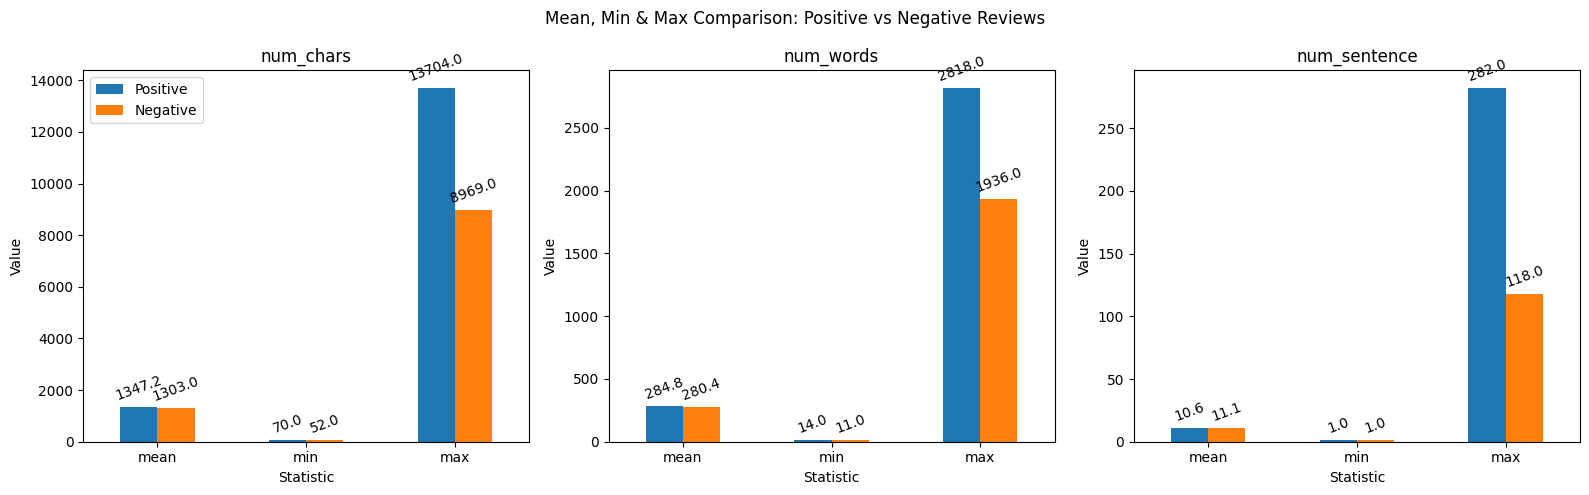

In [13]:
def plot_pos_neg_stats(pos_stats, neg_stats, features, stats=("mean", "min", "max")):
    """
    Plot mean/min/max for positive vs negative reviews.

    @param:
    - pos_stats: describe() DataFrame for positive class
    - neg_stats: describe() DataFrame for negative class
    - features: list of feature names (e.g. num_words)
    - stats: tuple of statistics to plot (must be in stats)

    @returns:
    - plots for positive and negative reviews
    """

    pos_vals = pos_stats.loc[list(stats)]
    neg_vals = neg_stats.loc[list(stats)]

    plt.figure(figsize=(16, 5))

    for i, feature in enumerate(features, 1):
        plt.subplot(1, len(features), i)

        plot_df = pd.DataFrame({
            "Positive": pos_vals[feature],
            "Negative": neg_vals[feature]
        }, index=stats)

        bars = plot_df.plot(kind="bar", ax=plt.gca(), legend=(i == 1))

        plt.title(feature)
        plt.xlabel("Statistic")
        plt.ylabel("Value")
        plt.xticks(rotation=0)

        # show values on top of bars
        for container in bars.containers:
            bars.bar_label(container, fmt="%.1f", padding=3, rotation=20)

    plt.suptitle("Mean, Min & Max Comparison: Positive vs Negative Reviews")
    plt.tight_layout()
    plt.show()


features = ["num_chars", "num_words", "num_sentence"]

plot_pos_neg_stats(
    train_data_pos_stats,
    train_data_neg_stats,
    features
)


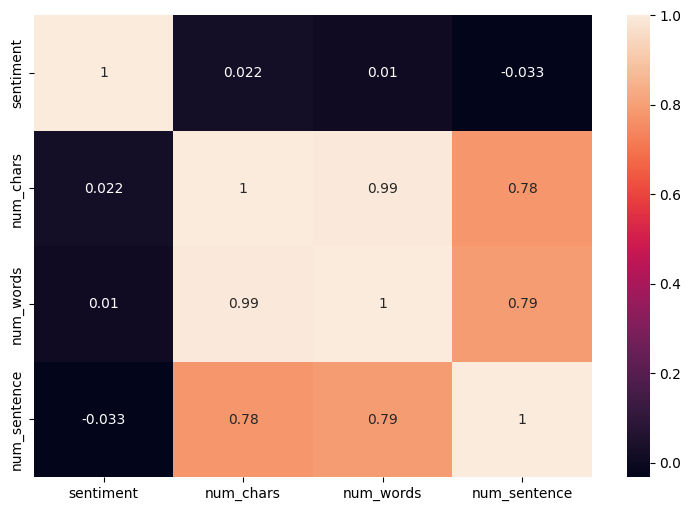

In [14]:
#visualizing correlation b/w num_chars, num_words, num_sentences

#getting only the numeric cols
df_numeric = df_train.select_dtypes(include=np.number)

#plotting the correlation
plt.figure(figsize=(9, 6))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

**Conclusion from above correlation heatmap**: The no. of chars, words and sentences are highly correlated as expected and this is self explainatory

## **3. Data Pre Preprocessing**

1. Convert all texts to lower case
2. Remove special chars
3. Perform Tokenization
4. Remove stop words
5. Remove puntuations
6. Perform Stemming


In [15]:
#examining a raw sample of train and test dataframe row before Data Pre Preprocessing
print(df_train['review'].iloc[0])
print()
print(df_test['review'].iloc[0])

This was one of those wonderful rare moments in T.V. that I wished I'd captured forever on VHS. Won't it ever air again? <br /><br />It was so creative and I remember it was aired once a week and the wait for the next episode was excruciating. I want to see it all again. I want to buy it. I want what I can't have. Not even on EBAY. <br /><br />So, having ranted enough it was, by far, one of the best series the 80's put out. It should be considered a classic but is lost in space. At least this website and Wikipedia mention it. Sob.<br /><br />It was utterly appealing, funny, flirtatious, and original. Maybe not like Sherlock Holmes original, I actually think Quintin is far more attractive and has a better chance with his leading lady than the stiff and chalky Holmes ever could.

I've Seen The Beginning Of The Muppet Movie, But Just The Half. Because I Only Watched It At Mrs Kelly's Friend's House. The Songs Were The Best And The Muppets Were So Hilarious. They Learn That If They Believe

In [16]:
from nltk.corpus import stopwords
import re

#func to perform data processing
def text_transformer(text):
    """
    Performs the following on raw text:
    - convert to lowercase
    - remove html tags
    - remove urls
    - remove special chars
    - remove stopwords
    - perform stemming
    
    @param:
        - text: raw text

    @returns:
        - cleaned_text: processed text

    """

    #1. converting to lower case
    text = text.lower()

    #2. Removing html tags
    text = re.sub(r'<.*?>', '', text)

    #3. Removing urls
    text = re.sub(r'http\S+', '', text)

    # 4. Remove special chars
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 5. Tokenize
    tokens = nltk.word_tokenize(text)

    #getting stopwords from nltk
    stop_words = stopwords.words('english')

    #6. Remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    #7. Stemming: bring words to root form
    ps = nltk.PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]

    # 7. Join tokens back to string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [17]:
#storing the raw train and test df 
df_train_raw, df_test_raw = df_train.copy(), df_test.copy()

#preprocessing the train data
df_train['review'] = df_train['review'].apply(text_transformer)

#preprocessing the test data
df_test['review'] = df_test['review'].apply(text_transformer)

df_train.head()

,review,sentiment,num_chars,num_words,num_sentence
0,one wonder rare moment tv wish id captur forev...,1,787,191,13
1,seen graduat hail movi gener river run stori g...,1,4199,863,46
2,dont watch lot tv except offic weed entourag e...,1,1391,324,12
3,kubrick put display stun abil craft perfect am...,1,746,147,7
4,first like much central idea locat intrud othe...,1,1016,191,7


In [18]:
df_test_raw.head()

,review,sentiment,num_chars,num_words,num_sentence
0,"I've Seen The Beginning Of The Muppet Movie, B...",1,745,166,7
1,If it had been made 2 years later it would hav...,1,921,216,13
2,"Very good ""Precoder"" starring Dick Barthelmess...",1,1079,230,5
3,A young man discovers that life is precious af...,1,545,104,4
4,"I'm always surprised, given that the famous ti...",1,2259,464,11


In [19]:
#examining a raw sample of train and test dataframe row after Data Pre Preprocessing
print(df_train['review'].iloc[0])
print()
print(df_test['review'].iloc[0])

one wonder rare moment tv wish id captur forev vh wont ever air creativ rememb air week wait next episod excruci want see want buy want cant even ebay rant enough far one best seri put consid classic lost space least websit wikipedia mention sobit utterli appeal funni flirtati origin mayb like sherlock holm origin actual think quintin far attract better chanc lead ladi stiff chalki holm ever could

ive seen begin muppet movi half watch mr kelli friend hous song best muppet hilari learn believ end rainbow anyon make matter small matter greenwhich includ trailerkermit favorit protagonistwhich mean describ main charact muppet mel brook amaz play professor max krassman scene miss piggi save kermit kung fu guy coolth muppet movi best jim henson film hilari charact peopl cherish success film


All reviews of train and test data are cleaned

## **4. Feature Extraction**
- **Vectorization**: Converting text to TF-IDF vectors

TF-IDF is used because sentiment classification primarily depends on the relative importance of words and short phrases. TF-IDF converts text data to numerical data by assigning higher weights to words that are frequent within a review but rare across the corpus, making it effective for capturing sentiment-bearing terms

For TF-IFD:
- Limiting the max vocab (features) to 25000 `max_features=25000`: this balances training speed and most variety of words are covered
- ngram is set to bigram `ngram_range=(1, 2)`: As sentiment is mostly conveyed in 1–2 word phrases, not long or too short sequences
  * Unigram can destroy meaning. For example for words like "not good", "very bad" will be broke to "not", "very bad", "good", "very", "bad" and meaning will be lost
  * Trigram will be very rare
- Min document frequency `min_df = 5`: This will remove extremely rare words (appears in ≥0.02% of reviews). And will remove noise without discarding useful sentiment words.
- Max document frequency `max_df=0.92`: This will remove too common words (appearing in >92% of reviews). Very common words carry zero sentiment information.
- `sublinear_tf=True`: This will prevents long reviews from dominating by using log scale for calcualating TF.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

"""
max_features: limit vocab to 25000
ngram_range: unigrams + bigrams
min_df: ignore words that appear in fewer than 5 training documents.
max_df: Drop words appearing in > 92% of documents.
sublinear_tf: Replace tf with 1 + log(tf). Prevents long reviews from dominating
"""

#tfidf vectorizer
tfidf_vect = TfidfVectorizer(
    max_features=25000,
    ngram_range=(1, 2),     
    min_df=5,               
    max_df=0.92,            
    sublinear_tf=True
)

#converting train text to tf-idf vectors
X_train_tfidf = tfidf_vect.fit_transform(df_train["review"]).toarray()
y_train = df_train["sentiment"].values

#for test data
X_test_tfidf  = tfidf_vect.transform(df_test["review"]).toarray()
y_test = df_test["sentiment"].values

In [21]:
print("For Linear SVM:")
print(f"For train: Shape of X: {X_train_tfidf.shape}, Shape of y: {y_train.shape}")
print(f"For test: Shape of X: {X_test_tfidf.shape}, Shape of y: {y_test.shape}")

For Linear SVM:
For train: Shape of X: (25000, 25000), Shape of y: (25000,)
For test: Shape of X: (25000, 25000), Shape of y: (25000,)


**NOTE:** 

For RBF and Polynomial kernel SVM the training time complexity is too high and unstable with larage number of features and samples as done for Linear SVM. So the following is done:

1. For RBF and Polynomial kernel SVM the no. of features in TF-IDF vectorizer is limited to 3500
2. The training and testting is done only on 5000 samples only instead of 25000
3. Testing is done on full sample of testing data (25000 samples)


In [22]:
from sklearn.model_selection import train_test_split

#tfidf vectorizer: used for RBF and Polynomial kernel
tfidf_vect_small = TfidfVectorizer(
    max_features=3500,
    ngram_range=(1, 2),                    
    max_df=0.92,            
    sublinear_tf=True
)

#converting train text to tf-idf vectors
X_train_tfidf_small = tfidf_vect_small.fit_transform(df_train["review"]).toarray()

#converting test text to tf-idf vectors
X_test_tfidf_small = tfidf_vect_small.fit_transform(df_test["review"]).toarray()

#splitting train data to take 5000 samples only for RBF and Poly kernel SVM
X_train_sub, _, y_train_sub, _ = train_test_split(
    X_train_tfidf_small,
    y_train,
    train_size=5000,
    stratify=y_train,
    random_state=42
)

In [23]:
print("For SVM with RBF and Polynomial kernels:")
print(f"For train: Shape of X: {X_train_sub.shape}, Shape of y: {y_train_sub.shape}")
print(f"For test: Shape of X: {X_test_tfidf_small.shape}, Shape of y: {y_test.shape}")

For SVM with RBF and Polynomial kernels:
For train: Shape of X: (5000, 3500), Shape of y: (5000,)
For test: Shape of X: (25000, 3500), Shape of y: (25000,)


Features are extracted from dataset and converted to numeric form using Tf-IDF vectorization

## **5. Model building and training**

* Training is done for SVM with linear, RBF and polynomial kernel using various hyperparamers
* Comparition is done for various algo on basis of various evaluation metrices:
  - Accuracy
  - Precision
  - Recal
  - F1 Score
  - Confusion Matrix
  - ROC curve
  - AUC

In [24]:
def save_misclassifications(y_true, y_pred, X_raw, X_processed, file_identifier="model", save=True):
    """
    Returns misclassification report for given data with true, predicted label
    
    @params
    - y_true: true labels
    - y_pred: predicted labels
    - X_raw: raw training data before text processing
    - X_processed: raw training data after text processing
    """

    #get misclassifed indexes
    mis_idx = np.where(y_true != y_pred)[0]
    
    misclassified_df = pd.DataFrame({
        "actual_label": y_test[mis_idx],
        "predicted_label": y_pred[mis_idx],
        "num_chars_raw": X_raw.iloc[mis_idx]["num_chars"],
        "num_words_raw": X_raw.iloc[mis_idx]["num_words"],
        "num_sentence_raw": X_raw.iloc[mis_idx]["num_sentence"],
        "review": X_raw.iloc[mis_idx]["review"],
        "processed_review": X_processed.iloc[mis_idx]["review"],
    })

    if save:
        
        file_name = f"{'_'.join(file_identifier.split(' '))}_misclassified_reviews.csv".lower()
        misclassified_df.to_csv(file_name, index=False)
        print(Fore.BLUE + f"Saved misclassification report for {file_identifier} to: {file_name}")

    return misclassified_df
    

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc

def evaluate_model(
    models, X_train, y_train, X_test, y_test,
    X_test_raw=None, X_test_processed=None, 
    save_misclassification=True, return_misclassified_df=False
):
    """
    Performs training for given models and returns evaluated score. Misclassified results are also saved to csv file using 
    save_misclassifications function, if X_test_raw and X_test_processed are provided
    
    @param
    - models: a dict of model instances
        * format: {
            "svm_linear": LinearSVC()
        }
    - X_train: Vectorized training data
    - y_train: training label
    - X_test: Vectorized testing data
    - y_test: testing label
    - X_test_raw: raw X_test before text processing or Vectorization
    - X_test_processed: X_test after text processing but before Vectorization
    - save_misclassification: if set to True saved the misclassifed data to csv 
    - return_misclassified_df: if set to True returns the misclassifed df for each model 

    @return
    - models_eval
    """

    models_eval = {}

    for model_name, model in models.items():
        print(Fore.BLUE+f"Started with model: {model_name} ....")
        
        #fit model (train)
        model.fit(X_train, y_train)

        #get decision scores (for ROC)
        scores = model.decision_function(X_test)

        # make prediction from scores
        y_pred = (scores > 0).astype(int)

       
        #evaluate model score
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, scores)
        roc_auc = auc(fpr, tpr)

        models_eval[model_name] = {
            "Accuracy": acc,
            "Confusion Matrix": cm,
            "F1 Score": f1,
            "Precision": precision,
            "Recall": recall,
            "ROC": {
                "FPR": fpr,
                "TPR": tpr,
                "AUC": roc_auc
            },
        }
        
        if X_test_raw is not None and X_test_processed is not None:
            #save misclassifications to file
            misclassified_data = save_misclassifications(
                y_true = y_test, 
                y_pred = y_pred, 
                X_raw = X_test_raw, 
                X_processed = X_test_processed,
                file_identifier = model_name,
                save = save_misclassification
            )
            
            #append to dict if wanted
            if return_misclassified_df: models_eval[model_name]["misclassified_data"] =  misclassified_data

        print(Fore.GREEN+"Finished ....\n")

    return models_eval
    

In [26]:
def extract_model_params(s):
    """
    Extract the value of C, d, g from model name

    @param
    - s: model name string

    @return
    - params: a dict containing value of C, d, g. None is its not present
    """
    
    params = {"C": None, "D": None, "G": None}
    
    matches = re.findall(r'([Cdg])\s*=\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)', s, re.IGNORECASE)

    for key, value in matches:
        params[key.upper()] = float(value)

    return params


In [27]:
def get_results_df(models_eval):
    """
    Reutrns dataframe of model metrices and its summery
    
    @params
    - models_eval: dict returned by evaluate_model()

    @returns
    - df_results: dataframe containing metrices for differnt models
    - df_summary: dataframe containing summery (min, max) of metrices of models
    """
    
    rows = []
    
    for i, (model_name, results) in enumerate(models_eval.items(), 1):
        
        #getting params like C, g, d from model name
        model_params = extract_model_params(model_name)    
        
        rows.append({
            "Model": model_name,
            "C": model_params["C"],
            "Gamma": model_params["G"],
            "Degree": model_params["D"],
            "Accuracy (%)": results["Accuracy"] * 100,
            "Precision": results["Precision"],
            "Recall": results["Recall"],
            "F1 Score": results["F1 Score"],
            "AUC": results["ROC"]["AUC"]
        })
        
    df_results = pd.DataFrame(rows)

    df_summary = pd.DataFrame({
        "Metric": ["Accuracy (%)", "Precision", "Recall", "F1 Score", "AUC"],
        "Min": [
            df_results["Accuracy (%)"].min(),
            df_results["Precision"].min(),
            df_results["Recall"].min(),
            df_results["F1 Score"].min(),
            df_results["AUC"].min()
        ],
        "Max": [
            df_results["Accuracy (%)"].max(),
            df_results["Precision"].max(),
            df_results["Recall"].max(),
            df_results["F1 Score"].max(),
            df_results["AUC"].max()
        ]
    })

    return df_results, df_summary

In [28]:
def plot_classification_metrics(
    df,
    figsize=(10, 4),
    loc = "lower right",
    model_col="Model",
    metrics=None,
    main_title="Classification Metrics Comparison for Different Models"
):
    """
    Plot classification metrics comparison for multiple models.

    @params
    - df (pd.DataFrame): DataFrame containing model names and evaluation metrics. Cols: Model, Accuracy (%), Precision, Recall, F1 Score, AUC
    - figsize (tupple): defining size of plot figure
    - loc (int): position of lagend in plot
    - model_col (str): Column name containing model identifiers (default: "Model")
    - metrics (list[str] | None): List of metric column names to plot. Default: ["Accuracy (%)", "Precision", "Recall", "F1 Score", "AUC"]
    - main_title (str): Title for the plot (default: "Classification Metrics Comparison for Different Models")

    @returns
    - Plots a line plot comparing classification metrics across models
    """

    if metrics is None:
        metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

    df["Accuracy"] = df["Accuracy (%)"] / 100

    n_models = len(df)
    n_metrics = len(metrics)

    rotation_angle = 0 if n_models < 6 else 45

    x = np.arange(n_models)
    bar_width = 0.15


    plt.figure(figsize=figsize)

    for i, metric in enumerate(metrics):
        metric_val = df[metric] if metric=="Accuracy (%)" else df[metric]*100
        bars = plt.bar(
            x + i * bar_width,
            df[metric],
            width=bar_width,
            label=metric
        )

     # add value labels
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:.2f}",
                ha="center",
                va="bottom",
                fontsize=8,
                rotation=rotation_angle
            )


    plt.xlabel("Models")
    plt.ylabel("Scores")
    plt.title(main_title)

    plt.xticks(
        x + bar_width * (n_metrics - 1) / 2,
        df[model_col],
        rotation=rotation_angle,
        ha="center"
    )
    plt.ylim(0, 1.2)
    plt.legend(loc=loc)
    plt.tight_layout()
    plt.show()


In [29]:
def plot_cm(models_eval, figsize=(16, 5), main_title="Confusion Matrix for Different Models"):
    """
    Plot multiple confusion matrices using a single plot.
    
    @params
    - models_eval: dict returned by evaluate_model()
    - main_title: title to be put using suptitle, default: "Confusion Matrix for Different Models"

    @returns
    - plots all cms with title
    """

    num_models = len(models_eval)


    #different cmaps for differnt cms
    cmap_list = [
        "Blues",
        "Greens",
        "Oranges",
        "Purples",
        "Reds",
    ]

    plt.figure(figsize=figsize)

    for i, (model_name, results) in enumerate(models_eval.items(), 1):
        plt.subplot(1, num_models, i)

        sns.heatmap(
            results["Confusion Matrix"],
            annot=True,
            fmt='d',
            cmap=cmap_list[i-1],
            xticklabels=['Neg', 'Pos'],
            yticklabels=['Neg', 'Pos'],
            cbar=False
        )
        plt.title(f"CM for {model_name}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")

    plt.suptitle(main_title)
    plt.tight_layout()
    plt.show()

In [30]:
def plot_roc_curves(models_eval, figsize=(7, 5), main_title="ROC Curve Comparison"):
    """
    Plot multiple ROC curves using a single plot.

    Parameters:
    - models_eval: dict returned by evaluate_model()
    - main_title: title for the plot
    """

    plt.figure(figsize=figsize)

    color_list = [
        "blue", "green", "red", "orange", "purple","brown"
    ]

    for i, (model_name, results) in enumerate(models_eval.items()):
        roc_data = results["ROC"]
        fpr = roc_data["FPR"]
        tpr = roc_data["TPR"]
        auc_score = roc_data["AUC"]

        plt.plot(
            fpr,
            tpr,
            color=color_list[i-1],
            label=f"{model_name} (AUC = {auc_score:.2f})"
        )

    # Random classifier baseline
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")

    plt.xlabel("False Positive Rate (Fall Out)")
    plt.ylabel("True Positive Rate (Recall/Sensitivity)")
    plt.title(main_title)
    plt.legend()
    plt.grid(True)
    plt.show()


### **5.1 Training different varients of Linear SVM**
- By experimenting with different values of **hyperparameter C**
- Small C → strong regularization → wide margin 
- Large C → weak regularization → narrow margin 

In [31]:
from sklearn.svm import LinearSVC , SVC

C_values = [0.01, 0.1, 1, 10]

linear_svm_models = {}

for C in C_values:
    linear_svm_models[f"Linear SVM C={C}"] = LinearSVC(C=C, max_iter=10000)

linear_svm_models

{'Linear SVM C=0.01': LinearSVC(C=0.01, max_iter=10000),
 'Linear SVM C=0.1': LinearSVC(C=0.1, max_iter=10000),
 'Linear SVM C=1': LinearSVC(C=1, max_iter=10000),
 'Linear SVM C=10': LinearSVC(C=10, max_iter=10000)}

In [32]:
#training all the Linear SVM models
linear_eval = evaluate_model(
    linear_svm_models,
    X_train_tfidf, y_train,
    X_test_tfidf, y_test,
    X_test_raw=df_test_raw,          
    X_test_processed=df_test,    
    save_misclassification = True,
    return_misclassified_df = False
)

Started with model: Linear SVM C=0.01 ....
Saved misclassification report for Linear SVM C=0.01 to: linear_svm_c=0.01_misclassified_reviews.csv
Finished ....

Started with model: Linear SVM C=0.1 ....
Saved misclassification report for Linear SVM C=0.1 to: linear_svm_c=0.1_misclassified_reviews.csv
Finished ....

Started with model: Linear SVM C=1 ....
Saved misclassification report for Linear SVM C=1 to: linear_svm_c=1_misclassified_reviews.csv
Finished ....

Started with model: Linear SVM C=10 ....
Saved misclassification report for Linear SVM C=10 to: linear_svm_c=10_misclassified_reviews.csv
Finished ....



In [33]:
df_linear_svm_results, df_linear_svm_summary = get_results_df(linear_eval)

df_linear_svm_results

,Model,C,Gamma,Degree,Accuracy (%),Precision,Recall,F1 Score,AUC
0,Linear SVM C=0.01,0.01,None,None,86.520,0.851912,0.88408,0.867698,0.940581
1,Linear SVM C=0.1,0.10,None,None,88.720,0.881824,0.89424,0.887989,0.956317
2,Linear SVM C=1,1.00,None,None,87.672,0.879391,0.87320,0.876285,0.949139
3,Linear SVM C=10,10.00,None,None,85.444,0.859589,0.84728,0.853390,0.932740


In [34]:
df_linear_svm_summary

,Metric,Min,Max
0,Accuracy (%),85.444000,88.720000
1,Precision,0.851912,0.881824
2,Recall,0.847280,0.894240
3,F1 Score,0.853390,0.887989
4,AUC,0.932740,0.956317


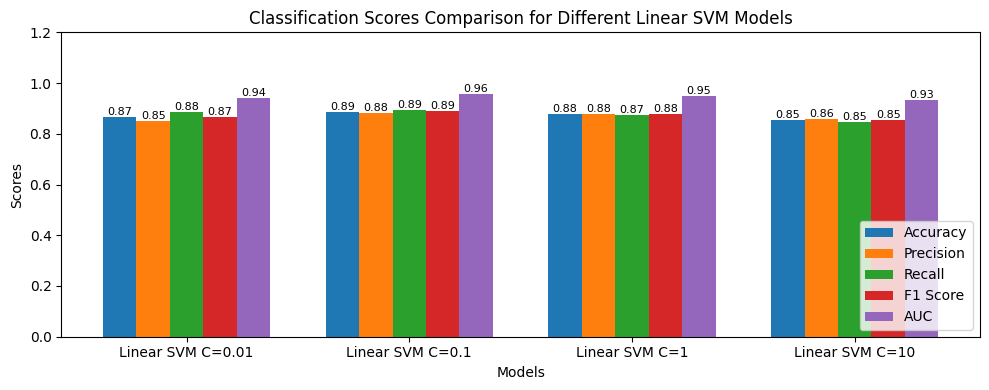

In [35]:
plot_classification_metrics(df_linear_svm_results, main_title="Classification Scores Comparison for Different Linear SVM Models")

1. `C=0.01`: most constrained model
   - Accuracy: 86.52%, F1: 0.8677, AUC: 0.9406
   - All above metrics are lower than maxiumun
   - Underfitting
2. `C=0.1`: **Optimal case**
   - Best Accuracy, F1 Score and AUC
   - Precision and Recall are high and balanced
3. `C=1` and `C=10`:
   - Metrices drops as C increases.
   - Model fits training data more aggressively
   - Overfitting

**Conclusion:** 
1. Increasing C increases model complexity
2. Performance improves up to a point (`C=0.1`) then decreases beyond that

> As the regularization parameter C increases, model performance initially improves and then degrades, indicating a bias–variance tradeoff. Very small C leads to underfitting, while large C values result in overfitting. The optimal balance is achieved at C = 0.1, which yields the highest F1-score and ROC–AUC.

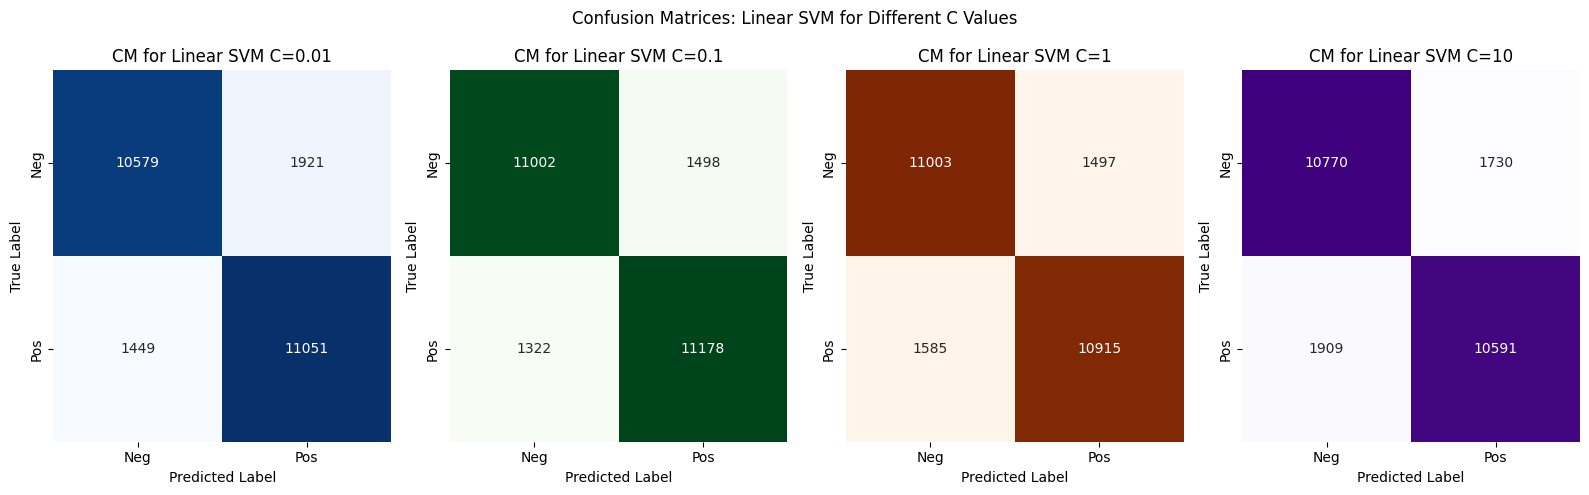

In [36]:
#plotting CM
plot_cm(linear_eval, main_title="Confusion Matrices: Linear SVM for Different C Values")

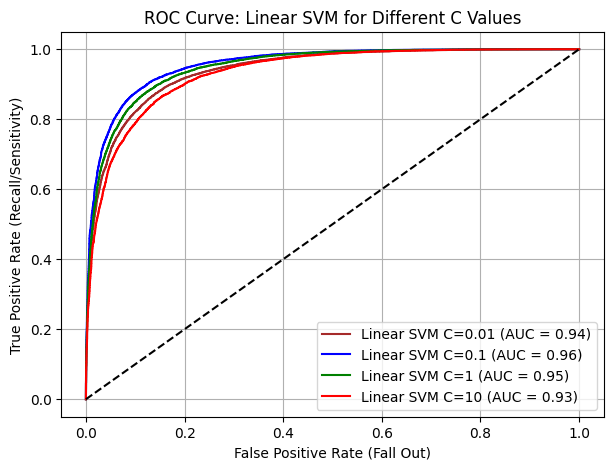

In [37]:
#plotting ROC
plot_roc_curves(linear_eval, main_title="ROC Curve: Linear SVM for Different C Values")

Linear SVM models with different regularization strengths are evaluated above. Confusion matrices and ROC–AUC curves demonstrate that moderate values of C (`C=0.1`) provide the best balance between margin maximization and classification accuracy, while very small or large C values lead to underfitting or overfitting respectively.

### **5.2 Training different varients of SVM with RBF Kernel**
- By experimenting with different values of **hyperparameter C** and **gamma**
- For RBF and Poly SVM smaller subset of training data used with less no. of features

In [38]:
C_values = [0.1, 1]
gamma_values = [0.001, 0.01]

rbf_svm_models = {}

for C in C_values:
    for gamma in gamma_values:
        model_name = f"RBF SVM (C={C}, g={gamma})"
        rbf_svm_models[model_name] = SVC(
            kernel="rbf",
            C=C,
            gamma=gamma
        )

rbf_svm_models

{'RBF SVM (C=0.1, g=0.001)': SVC(C=0.1, gamma=0.001),
 'RBF SVM (C=0.1, g=0.01)': SVC(C=0.1, gamma=0.01),
 'RBF SVM (C=1, g=0.001)': SVC(C=1, gamma=0.001),
 'RBF SVM (C=1, g=0.01)': SVC(C=1, gamma=0.01)}

In [39]:
#training all the RBF SVM models
rbf_eval = evaluate_model(
    rbf_svm_models,
    X_train_sub, y_train_sub,
    X_test_tfidf_small, y_test,  
    save_misclassification = False,
    return_misclassified_df = False
)

Started with model: RBF SVM (C=0.1, g=0.001) ....
Finished ....

Started with model: RBF SVM (C=0.1, g=0.01) ....
Finished ....

Started with model: RBF SVM (C=1, g=0.001) ....
Finished ....

Started with model: RBF SVM (C=1, g=0.01) ....
Finished ....



In [40]:
df_rbf_svm_results, df_rbf_svm_summary = get_results_df(rbf_eval)

df_rbf_svm_results

,Model,C,Gamma,Degree,Accuracy (%),Precision,Recall,F1 Score,AUC
0,"RBF SVM (C=0.1, g=0.001)",0.1,0.001,None,50.648,0.503273,0.99632,0.668743,0.581635
1,"RBF SVM (C=0.1, g=0.01)",0.1,0.010,None,50.648,0.503273,0.99632,0.668743,0.581634
2,"RBF SVM (C=1, g=0.001)",1.0,0.001,None,50.648,0.503273,0.99632,0.668743,0.581635
3,"RBF SVM (C=1, g=0.01)",1.0,0.010,None,50.648,0.503273,0.99632,0.668743,0.581634


In [41]:
df_rbf_svm_summary

,Metric,Min,Max
0,Accuracy (%),50.648000,50.648000
1,Precision,0.503273,0.503273
2,Recall,0.996320,0.996320
3,F1 Score,0.668743,0.668743
4,AUC,0.581634,0.581635


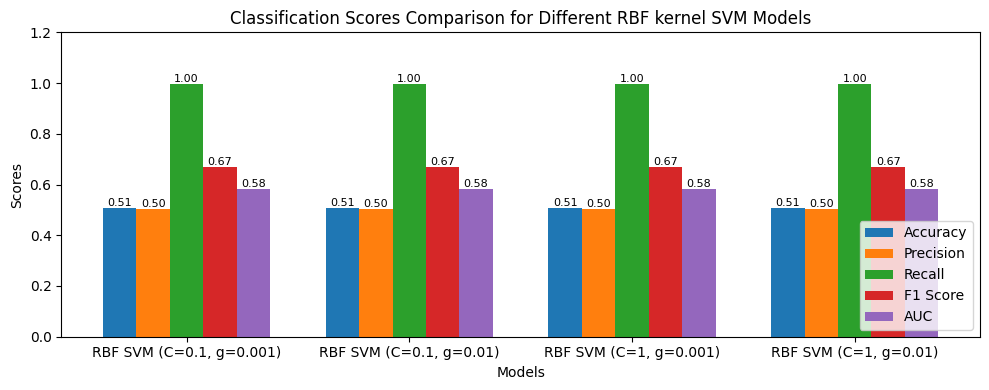

In [42]:
plot_classification_metrics(df_rbf_svm_results, main_title="Classification Scores Comparison for Different RBF kernel SVM Models")

1. All the models with differnt C and gamma values have almost same scores for accuracy, precision, recall, F1 and AUC
2. Accuracy ~51%: this means the models are just randomly gussing
3. Recall > 99%: this means that almost all positive labels are correctly identified
4. Precision ~50%: this means that almost halp of predicted positive labels are actually negative
5. So the model is predicting almost everything as positive label
6. AUC ~0.58: very poor than Linear SVM


**Conclusion:** 
1. The RBF kernel is not finding a useful nonlinear structure in this feature space.
2. This is because the data is linear separable

> RBF SVM models trained on a reduced TF-IDF feature space exhibit poor discriminative performance, with accuracy close to random and ROC–AUC around 0.69. The consistently high recall and low precision indicate a collapse toward predicting the majority class. This behavior persists across different values of C and gamma. Th Linear SVM is more preferable in sentiment classification.

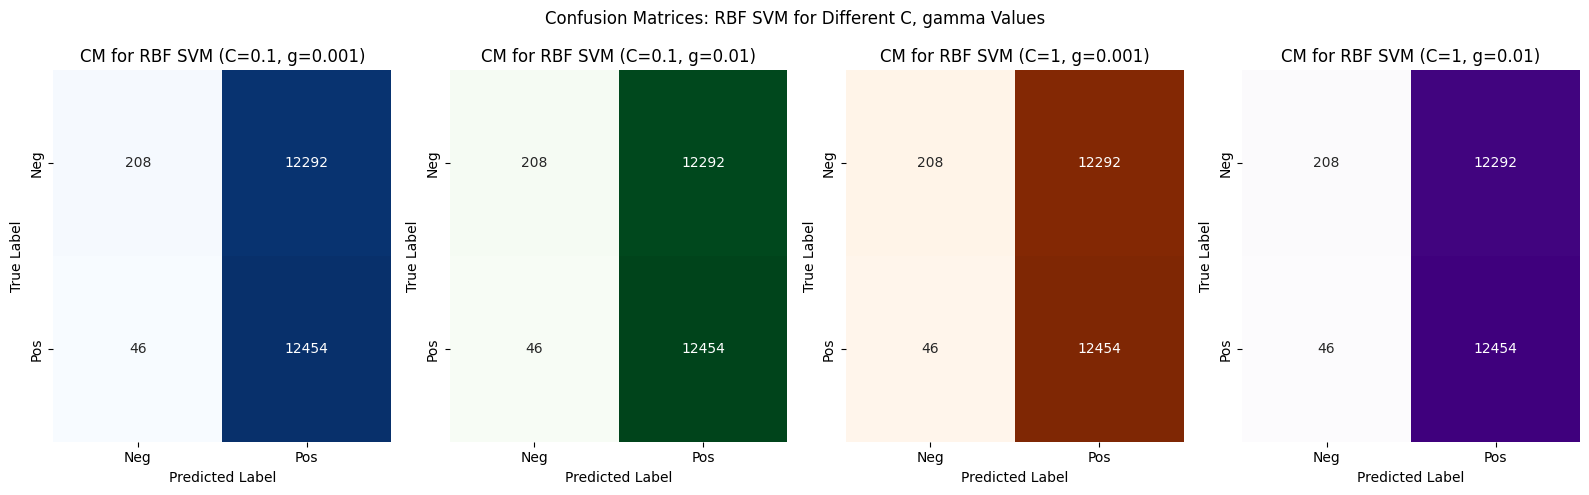

In [43]:
#plotting CM
plot_cm(rbf_eval, main_title="Confusion Matrices: RBF SVM for Different C, gamma Values")

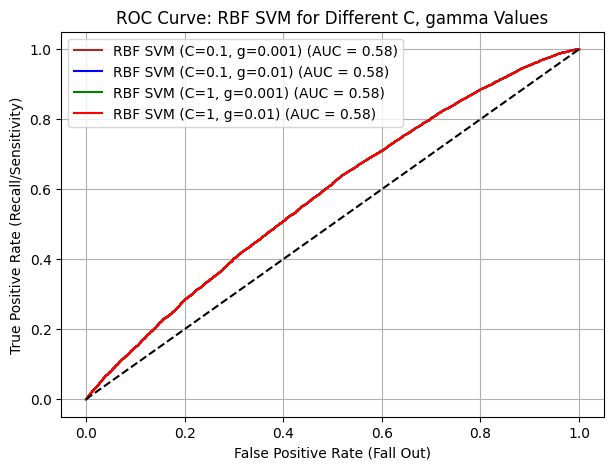

In [44]:
#plotting ROC
plot_roc_curves(rbf_eval, main_title="ROC Curve: RBF SVM for Different C, gamma Values")

### **5.3 Training different varients of SVM with Polynomial Kernel**
- By experimenting with different values of **hyperparameter C** and **gamma**
- Using the smaller dataset for training

In [45]:
poly_models = {}

C_values = [0.1, 1]
degrees = [2, 3]

for C in C_values:
    for degree in degrees:
        model_name = f"Poly SVM (C={C}, d={degree})"
        poly_models[model_name] = SVC(
            kernel="poly",
            degree=degree,
            C=C,
            gamma="scale",
            coef0=0,
            cache_size=2000
        )

poly_models

{'Poly SVM (C=0.1, d=2)': SVC(C=0.1, cache_size=2000, coef0=0, degree=2, kernel='poly'),
 'Poly SVM (C=0.1, d=3)': SVC(C=0.1, cache_size=2000, coef0=0, kernel='poly'),
 'Poly SVM (C=1, d=2)': SVC(C=1, cache_size=2000, coef0=0, degree=2, kernel='poly'),
 'Poly SVM (C=1, d=3)': SVC(C=1, cache_size=2000, coef0=0, kernel='poly')}

In [46]:
#training all the poly SVM models
poly_eval = evaluate_model(
    poly_models,
    X_train_sub, y_train_sub,
    X_test_tfidf_small, y_test,  
    save_misclassification = False,
    return_misclassified_df = False
)

Started with model: Poly SVM (C=0.1, d=2) ....
Finished ....

Started with model: Poly SVM (C=0.1, d=3) ....
Finished ....

Started with model: Poly SVM (C=1, d=2) ....
Finished ....

Started with model: Poly SVM (C=1, d=3) ....
Finished ....



In [47]:
df_poly_svm_results, df_poly_svm_summary = get_results_df(poly_eval)

df_poly_svm_results

,Model,C,Gamma,Degree,Accuracy (%),Precision,Recall,F1 Score,AUC
0,"Poly SVM (C=0.1, d=2)",0.1,None,2.0,50.000,0.500000,1.00000,0.666667,0.575655
1,"Poly SVM (C=0.1, d=3)",0.1,None,3.0,50.000,0.500000,1.00000,0.666667,0.569871
2,"Poly SVM (C=1, d=2)",1.0,None,2.0,53.596,0.523697,0.79472,0.631351,0.558531
3,"Poly SVM (C=1, d=3)",1.0,None,3.0,50.784,0.503984,0.99184,0.668356,0.564819


In [48]:
df_poly_svm_summary

,Metric,Min,Max
0,Accuracy (%),50.000000,53.596000
1,Precision,0.500000,0.523697
2,Recall,0.794720,1.000000
3,F1 Score,0.631351,0.668356
4,AUC,0.558531,0.575655


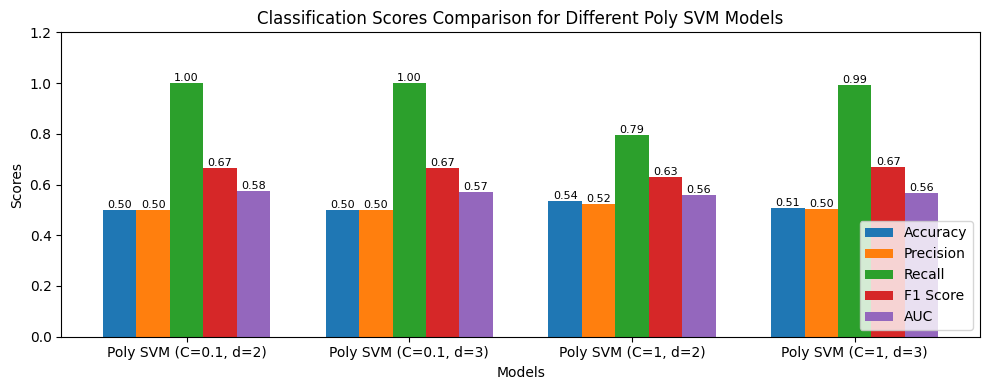

In [49]:
plot_classification_metrics(df_poly_svm_results, main_title="Classification Scores Comparison for Different Poly SVM Models")

1. All the models with differnt C and gamma values have almost same scores for accuracy, precision, recall, F1 and AUC
2. Accuracy ~50 to 54%: this means the models are just randomly gussing
3. Recall=100% (for 3) Precision ~50% to 52: Every positive is predicted correctly and almost every negative is misclassified as positive. The model is predicting almost everything as positive.
6. AUC ~0.55 to 0.57: very poor seperation (much less than Linear SVM)


**Conclusion:** 
1. The Poly Kernel is unable to generalize meaningful patterns
2. This is because the data is linear separable

> Polynomial SVM models exhibit near-random classification performance, with accuracy close to 50% and ROC–AUC around 0.56. High recall and low precision indicate that most samples are predicted as positive. These results demonstrate that polynomial kernels is not suitable for high-dimensional sparse TF-IDF representations in sentiment analysis.

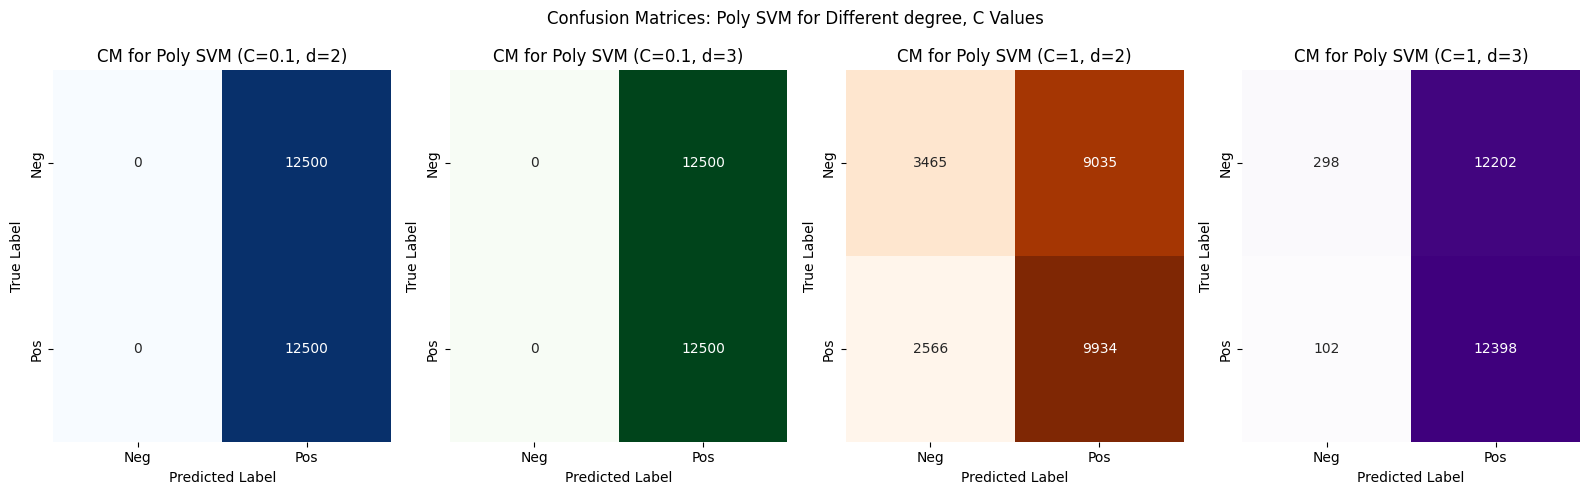

In [50]:
#plotting CM
plot_cm(poly_eval, main_title="Confusion Matrices: Poly SVM for Different degree, C Values")

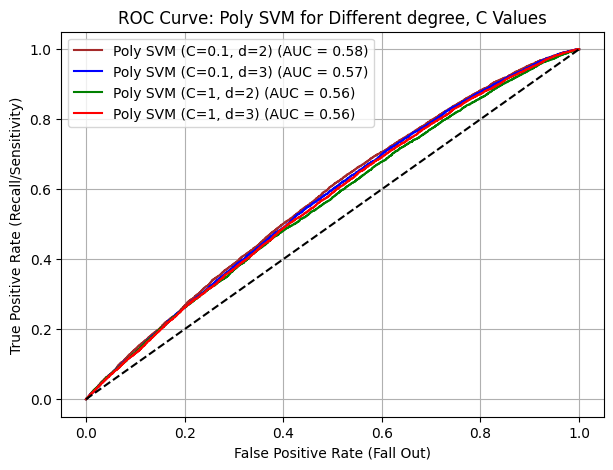

In [51]:
#plotting ROC
plot_roc_curves(poly_eval, main_title="ROC Curve: Poly SVM for Different degree, C Values")

In [52]:
#concatinate all 3 svm model types scores in a single df

df_linear_svm_results["Kernel"] = "Linear"
df_rbf_svm_results["Kernel"] = "RBF"
df_poly_svm_results["Kernel"] = "Polynomial"

df_linear_svm_results_c = df_linear_svm_results.fillna("N/A")
df_rbf_svm_results_c = df_rbf_svm_results.fillna("N/A")
df_poly_svm_results_c = df_poly_svm_results.fillna("N/A")

df_all_svm_results = pd.concat(
    [df_linear_svm_results_c, df_rbf_svm_results_c, df_poly_svm_results_c],
    ignore_index=True
)

df_all_svm_results

,Model,C,Gamma,Degree,Accuracy (%),Precision,Recall,F1 Score,AUC,Accuracy,Kernel
0,Linear SVM C=0.01,0.01,N/A,N/A,86.520,0.851912,0.88408,0.867698,0.940581,0.86520,Linear
1,Linear SVM C=0.1,0.10,N/A,N/A,88.720,0.881824,0.89424,0.887989,0.956317,0.88720,Linear
2,Linear SVM C=1,1.00,N/A,N/A,87.672,0.879391,0.87320,0.876285,0.949139,0.87672,Linear
3,Linear SVM C=10,10.00,N/A,N/A,85.444,0.859589,0.84728,0.853390,0.932740,0.85444,Linear
4,"RBF SVM (C=0.1, g=0.001)",0.10,0.001,N/A,50.648,0.503273,0.99632,0.668743,0.581635,0.50648,RBF
5,"RBF SVM (C=0.1, g=0.01)",0.10,0.01,N/A,50.648,0.503273,0.99632,0.668743,0.581634,0.50648,RBF
6,"RBF SVM (C=1, g=0.001)",1.00,0.001,N/A,50.648,0.503273,0.99632,0.668743,0.581635,0.50648,RBF
7,"RBF SVM (C=1, g=0.01)",1.00,0.01,N/A,50.648,0.503273,0.99632,0.668743,0.581634,0.50648,RBF
8,"Poly SVM (C=0.1, d=2)",0.10,N/A,2.0,50.000,0.500000,1.00000,0.666667,0.575655,0.50000,Polynomial
9,"Poly SVM (C=0.1, d=3)",0.10,N/A,3.0,50.000,0.500000,1.00000,0.666667,0.569871,0.50000,Polynomial


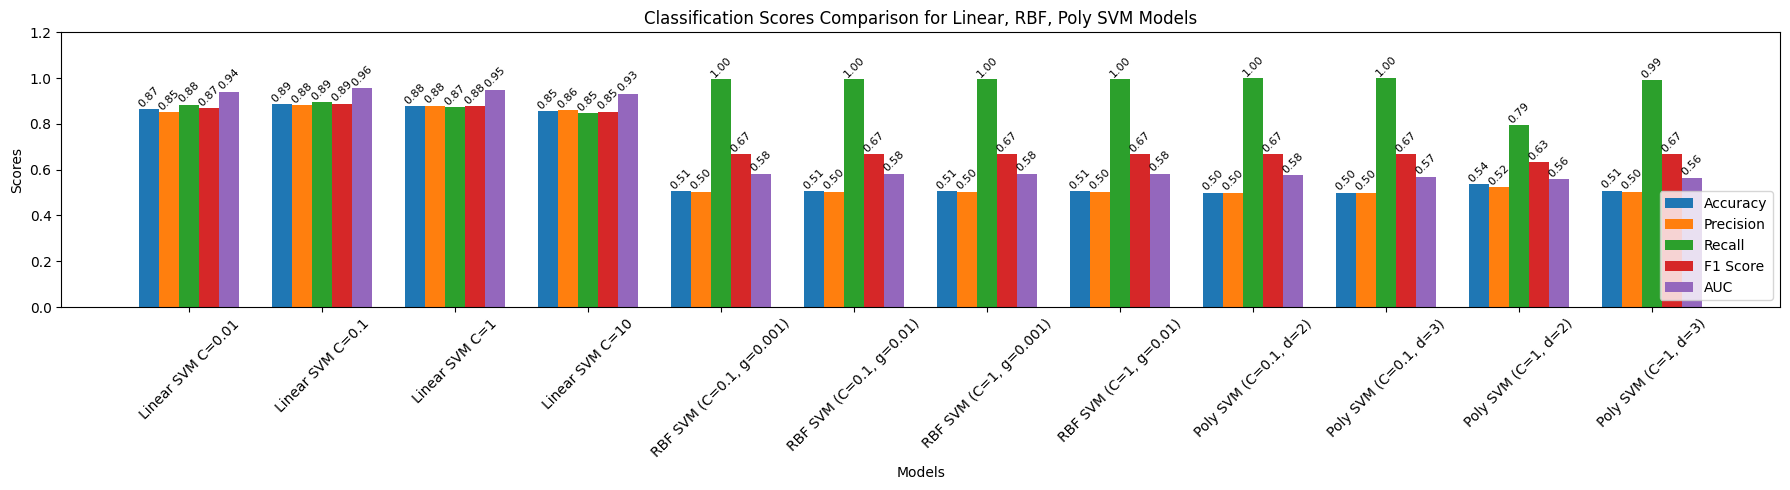

In [53]:
plot_classification_metrics(df_all_svm_results, figsize=(18, 5), main_title="Classification Scores Comparison for Linear, RBF, Poly SVM Models")